In [0]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import fetch_openml
from keras.datasets import mnist
import warnings
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization

Using TensorFlow backend.


In [0]:
# Loading the data from Mnist dataset

mnist = fetch_openml("mnist_784")
X, y = mnist["data"], mnist["target"]
print('Data size: {0} x {1} and label size {2}'.format(X.shape[0],X.shape[1],y.shape[0]))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))
print('The images are of size: {0} x {0}'.format(math.sqrt(X.shape[1])))

Data size: 70000 x 784 and label size 70000
The images are of size: 28.0 x 28.0
The images are of size: 28.0 x 28.0


In [0]:
# cnn basic model


shuffle_index = np.random.permutation(70000)

# reshuffle the data and use 60000 samples as training and 10000 as test

X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]


batch_size = 128
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
x_train = X_train
x_test = X_test

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'] )

model.summary()

histroy_model_cnn = model.fit(x_train, y_train, epochs=10, batch_size=batch_size , validation_data=(x_test, y_test))

score_train = model.evaluate(x_train,y_train,verbose=0)
score_test = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1]*100)
print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1]*100)


x_train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                589888    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 6

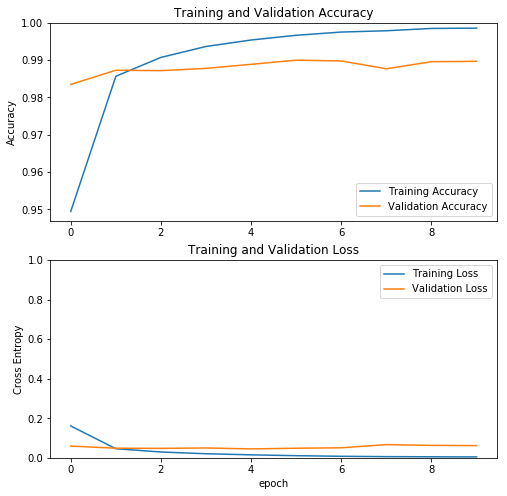

In [0]:

# grah for training and testing 

acc =histroy_model_cnn.history['acc']
val_acc = histroy_model_cnn.history['val_acc']
loss =histroy_model_cnn.history['loss']
val_loss = histroy_model_cnn.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
# CNN with drop-out 

shuffle_index = np.random.permutation(70000)

# reshuffle the data and use 60000 samples as training and 10000 as test

X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]

batch_size = 128
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
x_train = X_train
x_test = X_test

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

histroy_model_cnn_dropout = model.fit(x_train, y_train,
                                     batch_size=batch_size,
                                      epochs=10,verbose=1,
                                      validation_data=(x_test, y_test))

score_train = model.evaluate(x_train,y_train,verbose=0)
score_test = model.evaluate(x_test, y_test, verbose=0)

print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1]*100)
print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1]*100)

x_train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 9216)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 128)               1179776   
____________________

In [0]:
# grah for training and testing 

acc =histroy_model_cnn_dropout.history['acc']
val_acc =histroy_model_cnn_dropout.history['val_acc']
loss =histroy_model_cnn_dropout.history['loss']
val_loss = histroy_model_cnn_dropout.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [0]:
# CNN with batch-normalization 

shuffle_index = np.random.permutation(70000)

# reshuffle the data and use 60000 samples as training and 10000 as test

X_train, X_test, y_train, y_test = X[shuffle_index[:60000],:], X[shuffle_index[60000:],:], y[shuffle_index[:60000]], y[shuffle_index[60000:]]


batch_size = 128
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
x_train = X_train
x_test = X_test

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = Sequential()

#convolution 1st layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.25))

#convolution 2nd layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',border_mode="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

#convolution 3rd layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',border_mode="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.25))

#Fully connected 1st layer
model.add(Flatten()) 
model.add(Dense(500,use_bias=False)) 
model.add(BatchNormalization())
model.add(Activation('relu')) 
model.add(Dropout(0.25))      

#Fully connected final layer
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(x_train, y_train))

score_train = model.evaluate(x_train,y_train,verbose=0)
score_test = model.evaluate(x_test, y_test, verbose=0)


print('Train loss:', score_train[0])
print('Train accuracy:', score_train[1]*100)
print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1]*100)



x_train shape: (60000, 28, 28, 1)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")`


Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_17 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
dropout_27 (Dropout)         (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
batch_normalization_18 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 13, 13, 64)      

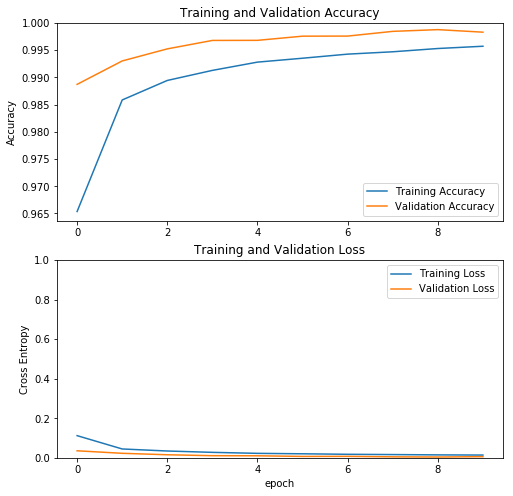

In [0]:
# grah for training and testing 

acc =history.history['acc']
val_acc =history.history['val_acc']
loss =history.history['loss']
val_loss = history.history['val_loss']
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()